## Question: Based on the available sales data of 2019, figure out the way to optimize the revenue of 2020?
CONTENT: (3 parts)
<li> Before analyzing data, get ready (import libraries, add columns, drop unnecessary columns)
<li> Analyze data to answer the question
<li> Conclusion
  
    
DATASET DESCRIPTION: 
<li> Tracking the sales of a consumer electronics company in 2019. The company has 8 markets which are 8 states. Each state has from 1 to 2 cities market. They are selling 18 different products falling into 9 different categories.


## Get ready before analysis with 3 tasks

#### Task 1: Import library and the sales data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset and name it "df"
df = pd.read_csv('Sales2019')

# Display the dataset with the first 3 rows 
df.head(3)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product Category,City,State,Revenue,Month,Hour,DayOfWeek,DayType
0,0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Phone,Boston,Massachusetts,700.00,1,21,Tuesday,Weekday
1,1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Cable,Portland,Oregon,14.95,1,14,Monday,Weekday
2,2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Headphones,San Francisco,California,23.98,1,13,Thursday,Weekday


#### Task 2: Add a column to distinguish 3 product types: low, medium, and high price, based on categorizing Products

In [2]:
# Add "Product Type" column:

# Step 1: Calculate average price for each product category, output is a new dataframe with a correct index
average_price = df.groupby('Product')['Price Each'].mean().reset_index()

# Step 2: Determine price range for low, medium, and high categories
price_min = average_price['Price Each'].min()
price_max = average_price['Price Each'].max()
price_range = (price_max - price_min) / 3

low_threshold = price_min + price_range
high_threshold = price_max - price_range

# Step 3: Create 'Price Type' column based on price ranges
def get_price_type(price):
    if price <= low_threshold:
        return 'Low Price'
    elif price > high_threshold:
        return 'High Price'
    else:
        return 'Medium Price'
   
    
# Step 4: Add "Price Type" column to the dataframe df 
df['Product Type'] = df['Price Each'].apply(get_price_type)

#### Task 3: Drop unnecessary columns (which are not helpful for the Analysis)

In [3]:
df = df.drop(['Order Date','Purchase Address'], axis = 1)

#### Task 4: To not repeat a long code snippet later, let's define a class with functions for plotting charts

In [37]:
class plot_chart:
    # initiate a function to get a dataframe name as a argument
    def __init__(self, dataframe):
        self.df = dataframe
        
    # Define a function to plot vertical bar chart with 3 arguments
    # x_column represents categorical column, x_column represents numerical column, title is the chart name
    def vertical_bar(self, x_column, y_column, title):
        import matplotlib.ticker as ticker
        plt.figure(figsize=(4,3))
        plt.bar(self.df[x_column], self.df[y_column])
        plt.axhline(self.df[y_column].mean(), color='g', linestyle='--', label='Average')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.xticks(rotation=60)
        formatter = ticker.StrMethodFormatter('{x:,.0f}')
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.legend()
        plt.show()
    
    # Define a function to plot vertical bar chart with the 3 same arguments
    def horizontal_bar(self, x_column, y_column, title):
        plt.figure(figsize=(4,4))
        plt.barh(self.df[x_column], self.df[y_column])
        plt.axvline(self.df[y_column].mean(), color='g', linestyle='--', label='Average')
        plt.ylabel(x_column)
        plt.xlabel(y_column)
        plt.title(title)
        plt.legend()
        plt.show()
    
    # Define a function to plot vertical bar chart with the 3 same arguments
    def pie(self, x_column, y_column, title):
        plt.figure(figsize=(4, 4))
        plt.pie(self.df[y_column], labels=self.df[x_column], autopct='%1.1f%%')
        plt.title(title)
        plt.axis('equal')
        plt.show()  


# Part 2: Analyzing data to answer the question

## [Insight 1] For optimizing the total revenue, we should figure out how to increase the revenue of California which accounted for roughly 40% the total revenue. 

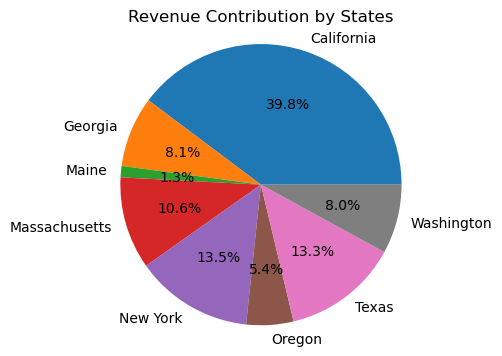

In [5]:
# Group data by State and calculate the total revenue
RevenueByState = df.groupby('State')['Revenue'].sum().reset_index()

# Plot the chart by using the Class plot_chart defined above
plot_chart(RevenueByState).pie('State','Revenue','Revenue Contribution by States')

## [Insight 2] 3 out of 18 products contributed 50% total revenue of the main market - California.
<li> Macbook Pro, iPhone and ThinkPad Laptop are the main products that mainly drove the revenue of California being top 1 market.
<li> Therefore focusing on increasing the revenue of these 3 main products will help to increase the revenue of California and optimize the total revenue of the company in 2020.

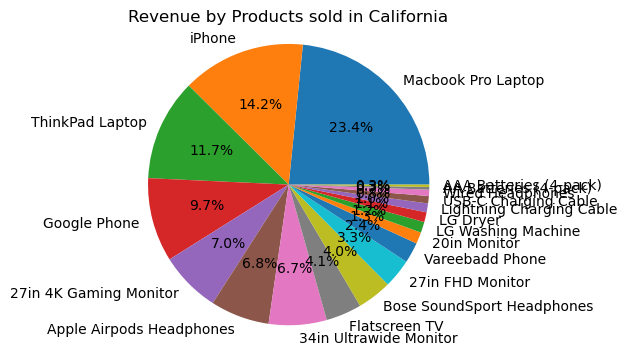

In [6]:
#  Filter all the sales data in California market from the dataset "df"
df_cali = df.loc[df['State']=='California']

# Group by Product sold in California and calculate the total of revenue
cali_prod_revenue = df_cali.groupby('Product')['Revenue'].sum().reset_index().sort_values('Revenue', ascending = False)

# Plot the chart, by using plot_chart class above
plot_chart(cali_prod_revenue).pie('Product','Revenue', 'Revenue by Products sold in California')

### Revenue of 3 main products changed over months in 2019, and the highest revenue was in 4th Quarter.

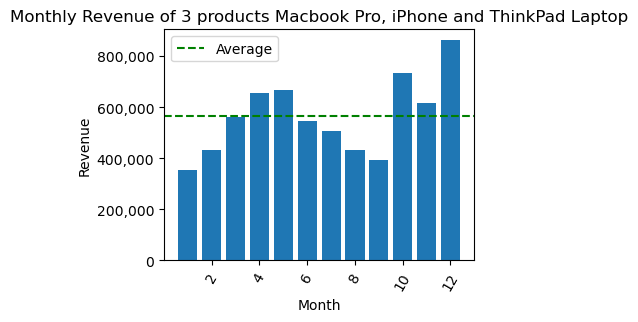

In [14]:
# Filter 3 products which contributed 50% revenue of Sales in California 
df_cali_3prod = df_cali.loc[df_cali['Product'].isin(['Macbook Pro Laptop','iPhone','ThinkPad Laptop'])]

# Calculate total revenue of 3 strongest products sold in California
MonthlyRevenue_3prod = df_cali_3prod.groupby('Month')['Revenue'].sum().reset_index()
plot_chart(MonthlyRevenue_3prod).vertical_bar('Month','Revenue','Monthly Revenue of 3 products Macbook Pro, iPhone and ThinkPad Laptop')

## [Question] What was the main reason that affected the 2019 revenue of these 3 products in California?

### [Break down by fomular] Revenue = Price * Unit Sold
From this popular fomular, Revenue can be affected by 2 elements: 3 main products' price and their number of sold quantity.

### The price of 3 products: was not the drive of their revenue 
Since their prices maintained the same over months in 2019. 

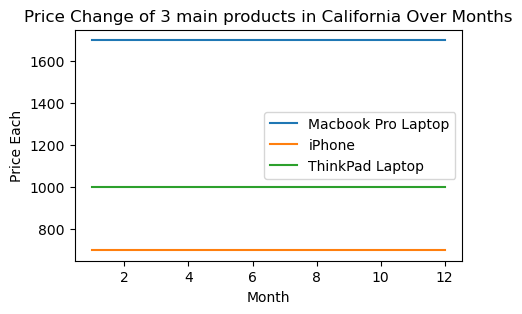

In [15]:
# Group by Product Name and Month, then calculate the average price in each month of 2019
MonthlyPrice_3prod = df_cali_3prod.groupby(['Month', 'Product'])['Price Each'].mean().reset_index()

plt.figure(figsize=(5,3))

for product in ['Macbook Pro Laptop','iPhone','ThinkPad Laptop']:
    product_data = MonthlyPrice_3prod[ MonthlyPrice_3prod['Product'] == product ]
    plt.plot(product_data['Month'], product_data['Price Each'], label=product)

plt.xlabel('Month')
plt.ylabel('Price Each')
plt.title('Price Change of 3 main products in California Over Months')
plt.legend()
plt.show()

### [Insight 3] However, Sold Quantity was the main driver of revenue change across months, since the distribution of Sold Quantity closely resembles the distribution of Revenue 
That means by affecting Sold Quantity of 3 Products, we can affect their revenue.

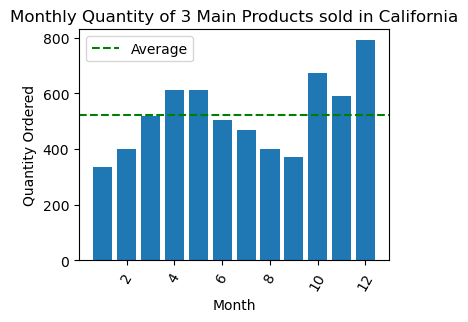

In [9]:
# Check the average Price of Macbook in each month
SoldQuantity_3prod = df_cali_3prod.groupby('Month')['Quantity Ordered'].sum().reset_index()


plot_chart(SoldQuantity_3prod).vertical_bar('Month','Quantity Ordered','Monthly Quantity of 3 Main Products sold in California')

### 99.9% of the orders consist of purchasing a single product.
This implies the need to focus on promoting the increase of orders for the 3 main products, rather than increasing the quantity of products purchased in each order.

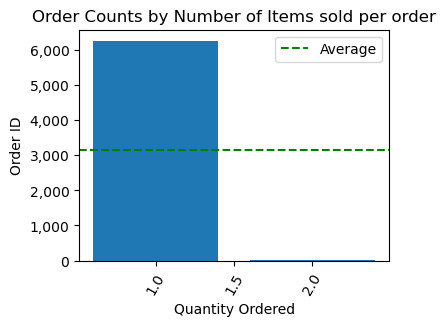

In [11]:
# Calculate number of orders of different number of items per order
QuantityOrdered = df_cali_3prod.groupby('Quantity Ordered')['Order ID'].count().reset_index()
#
plot_chart(QuantityOrdered).vertical_bar('Quantity Ordered', 'Order ID', 'Order Counts by Number of Items sold per order')

#### *I will calculate total sold quantity across different category for MANY TIMES later. For convernience, let's define a function for groupby()

In [17]:
# Define a function to calculate the total revenue by each category
# The function defined with 2 arguements: df - dataframe, cat_col - categorical column 
# It returns a new dataframe with 2 columns: categorical column and revenue column.

def group_by(df, cat_col):
    result = df.groupby(cat_col)['Quantity Ordered'].sum().reset_index().sort_values('Quantity Ordered', ascending=False)
    return result

### [Break down by month] The highest monthly revenue in both cities is Dec and the best quarter is 4th. Besides, we sold 3 products well on April.


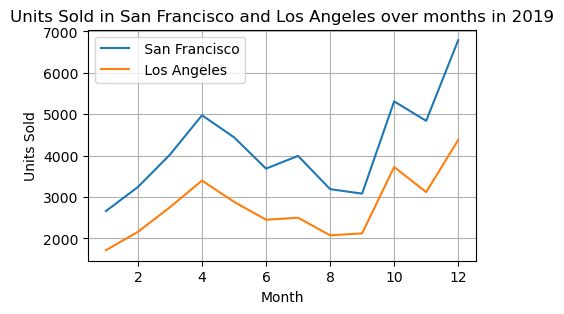

In [33]:
# Filter the dataset for San Francisco and Los Angeles
revenue_2cities = df[(df['City'] == ' San Francisco') | (df['City'] == ' Los Angeles')]

# Group the filtered dataset by 'Hour' and 'City' and calculate total revenue
MonthlyRevenue_2cities = revenue_2cities.groupby(['Month', 'City'])['Quantity Ordered'].sum().reset_index()

# Pivot the data to have separate columns for San Francisco and Los Angeles revenue
revenue_pivot = MonthlyRevenue_2cities.pivot(index='Month', columns='City', values='Quantity Ordered')

# Plot the line chart
plt.figure(figsize=(5, 3))

for city in [' San Francisco', ' Los Angeles']:
    plt.plot(revenue_pivot.index, revenue_pivot[city], label=city)

plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Units Sold in San Francisco and Los Angeles over months in 2019')
plt.legend()
plt.grid(True)
plt.show()


### [Break down by Hour] In San Francisco, the peak hours are 12AM and 7PM, while in Los Angeles, it is 8PM.

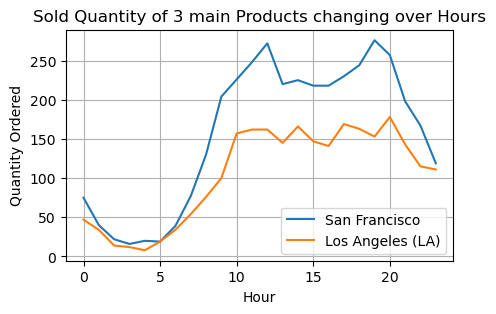

In [31]:
# Filter data for San Francisco
Sanfrancisco = df_cali_3prod[(df_cali_3prod['City'] == ' San Francisco')]

# Group data by hour and calculate total revenue for San Francisco
hourly_revenue_sf = Sanfrancisco.groupby('Hour')['Quantity Ordered'].sum()

# Filter data for Los Angeles (LA)
LosAngeles = df_cali_3prod[(df_cali_3prod['City'] == ' Los Angeles')]

# Group data by hour and calculate total revenue for Los Angeles (LA)
hourly_revenue_la = LosAngeles.groupby('Hour')['Quantity Ordered'].sum()

# Create the chart size
plt.figure(figsize=(5, 3)) 

# Plot line chart for San Francisco
plt.plot(hourly_revenue_sf.index, hourly_revenue_sf.values, label='San Francisco')

# Plot line chart for Los Angeles (LA)
plt.plot(hourly_revenue_la.index, hourly_revenue_la.values, label='Los Angeles (LA)')

plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')
plt.title('Sold Quantity of 3 main Products changing over Hours')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion
By running advertisements during peak hours such as 12AM and 7PM in San Francisco, and 8PM in Los Angeles, we can significantly increase the number of orders for the three key products, namely Macbook Pro, iPhone, and ThinkPad Laptop, in the California market. 

This not only helps California maintain the top market with the highest revenue but also contributes to overall company revenue growth as California accounts for nearly 40% of the total revenue. 

Running ads during peak hours and targeting the main market is the most effective strategy to optimize revenue.